<a href="https://colab.research.google.com/github/falakjaiin/cap-comp215/blob/2024.01/PROJECT1_SIR_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COMP 215 - PROJECT 1 (SIR - Epidemiological Model)
----------------
#### Name: Falak Jain,Ekakshar Modgil,Bhreego Kapoor
#### Date: 26 February 2024

***For these exercises, I took help of AI and some of my friends for a better concept clarity... I did not merely copy paste codes from anywhere, but yes I took help to understand the approach and syntaxes for my exercises... I really hope that this is acceptable :) ...***

***Content is also added from the project 1 pdf uploaded on eLearn..***

---

###**OBJECTIVES:-**

*   to develop a NetworkX Graph SIR model of disease epidemiology
*   to experiment with intervention policies, like masking or social distancing to examine their effect



###**WHAT IS SIR MODEL? :-**

The SIR (Susceptible-Infected-Recovered) model is a simple, predictive “Compartment Model” for infectious
diseases that are transmitted from human to human, and where recovery confers lasting resistance, such as
measles, mumps and rubella. https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_mode



###**PROBLEM STATEMENT AND EXPERIMENTING WITH SIR MODEL:-**


We use a WS Graph to model people (nodes) and social connections (edges). NetworkX has a built-in to create
graphs that make good models for this case:

G = nx.watts_strogatz_graph(n=NUM_INDIVIDUALS, k=AVERAGE_NUMBER_OF_CONNECTIONS, p=0.5)

Each node can be in one of three states: Susceptible, Infectious, Recovered (SIR).
The simulation starts with all nodes in the S state and a single node in the I state.
Each simulation step, neighbouring S nodes may become Infectious, with some probability, p.
Develop the SIR model with configurable initial state and parameters to control transmission and recovery
rates. The model can be purely deterministic or stochastic. Keep it simple.

Design an experiment to look at the potential effect of at least one policy, like mass vaccination, social
distancing, or masking, on the spread of infection and number of infected cells.
Display your results with at least one animation and one chart, and provide a short discussion about what this
model tells us about the spread of communicable diseases, and what you would do next if you had more time..

-------------------
-------------------
# Project work begins:--
As usual, the first code cell simply imports all the modules we'll be using...


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random

Introduce a class SIR_Model and initialize all the required variables.

*   num_individuals : Number of individuals sampled for experimenting
*   avg_num_connections : Average number of connections that can be plotted for the graph
*   prob_infection : Probability of the infection spread by the disease
*   prob_recovery : Probability of the person to recover from the disease
*   initial_nodes : Dictionary of the prdictions assumed initially



Next step is to introduce a class method that works as a simulation step.
Make another dictionary (copy of the first one) and modify the susceptible, infected or recovered entries in the dictionary according to the probabilities given for the infection or recovery.
And then simulate all the steps for the desired number of steps and call the method for the same  

Display the results using a graph and return the count of ***Susceptible*** , ***Infected*** , and ***Recovered*** individuals updated in our dictionary.

Here is an example to test my code...

> You can make some changes to the values and notice the variations in the graph... :)

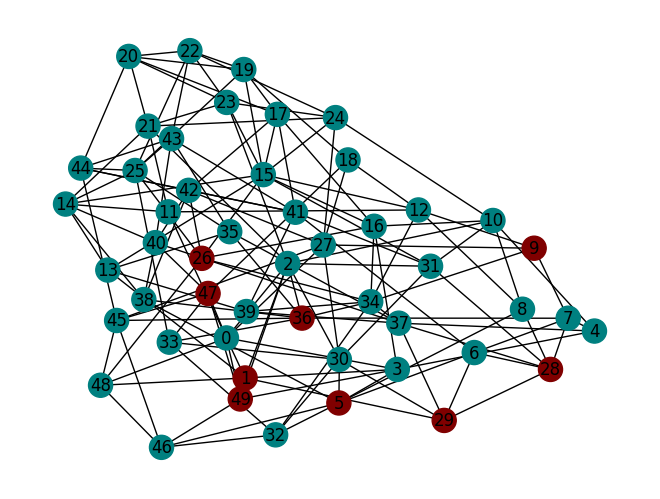

Susceptible Individuals:  0
Infected Individuals:  9
Recovered Individuals:  41


In [ ]:
class SIR_Model:
  def __init__(self , num_individuals , avg_num_connections , prob_infection , prob_recovery):
      self.num_individuals = num_individuals
      self.avg_num_connections = avg_num_connections
      self.prob_infection = prob_infection
      self.prob_recovery = prob_recovery
      self.graph = nx.watts_strogatz_graph(n=num_individuals, k=avg_num_connections, p=0.5)

      self.initial_nodes = {}
      for node in self.graph.nodes():
          self.initial_nodes[node] = 'S'

      random_node = random.choice(list(self.graph.nodes()))
      self.initial_nodes[random_node] = 'I'

  def simulation_step(self):
    nodes_copied = self.initial_nodes.copy()
    for node in self.graph.nodes():
      if self.initial_nodes[node] == 'S':
          for neighbor in self.graph.neighbors(node):
              if self.initial_nodes[neighbor] == 'I' and random.random() < self.prob_infection:
                  nodes_copied[node] = 'I'
                  break

      elif self.initial_nodes[node] == 'I' and random.random() < self.prob_recovery:
          nodes_copied[node] = 'R'

    self.initial_nodes = nodes_copied


  def simulate(self , num_steps):
    for i in range(num_steps):
        self.simulation_step()

  def plot_data(self):
    nodee_colors = {'S' : 'yellow' , 'I' : 'maroon' , 'R' : 'teal'}
    colorss = [nodee_colors[my_node] for my_node in self.initial_nodes.values()]
    nx.draw(self.graph , with_labels = True , node_color = colorss)
    plt.show()


  def return_data(self):
    num_susceptible = sum(my_node=='S' for my_node in self.initial_nodes.values())
    num_infected = sum(my_node=='I' for my_node in self.initial_nodes.values())
    num_recovered = sum(my_node=='R' for my_node in self.initial_nodes.values())
    return num_susceptible , num_infected , num_recovered

numm_individuals = 50
average_connections = 6
probability_infection = 0.2
probability_recovery = 0.1
num_of_steps = 24


sir_model = SIR_Model(numm_individuals , average_connections , probability_infection , probability_recovery)
sir_model.simulate(num_of_steps)
sir_model.plot_data()

numm_susceptible , numm_infected , numm_recovered = sir_model.return_data()

print("Susceptible Individuals: ", numm_susceptible)
print("Infected Individuals: ", numm_infected)
print("Recovered Individuals: ", numm_recovered)




